In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import VGG16_BN_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1).to(device)

#  Reprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.244, ECE: 0.027
Optimal temperature: 1.027
After temperature - NLL: 1.241, ECE: 0.020


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9119 ± 0.0016
Final Average Prediction Set Size: 12.38 ± 0.20
Final Average Coverage: 0.8991 ± 0.0026
Final Average Real Probability: 0.8109 ± 0.0027


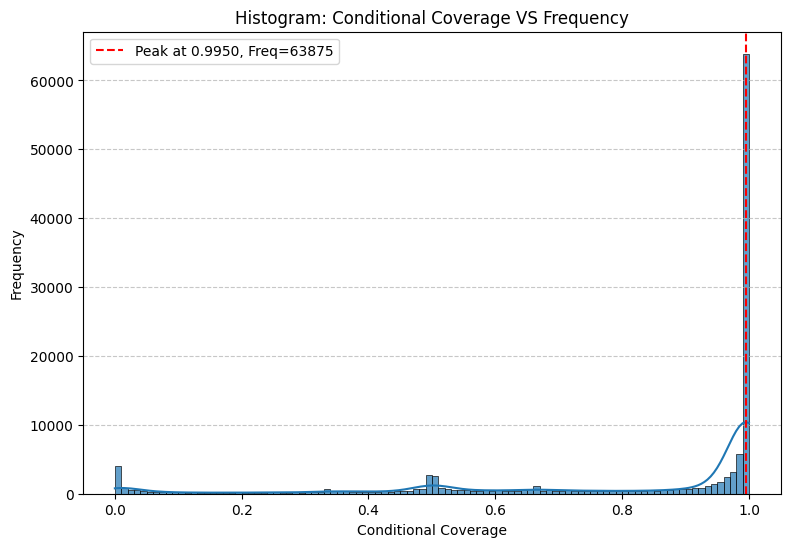

63875 (51.36%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9536 ± 0.0024
Final Average Prediction Set Size: 3.55 ± 0.03
Final Average Coverage: 0.8989 ± 0.0029
Final Average Real Probability: 0.7721 ± 0.0037


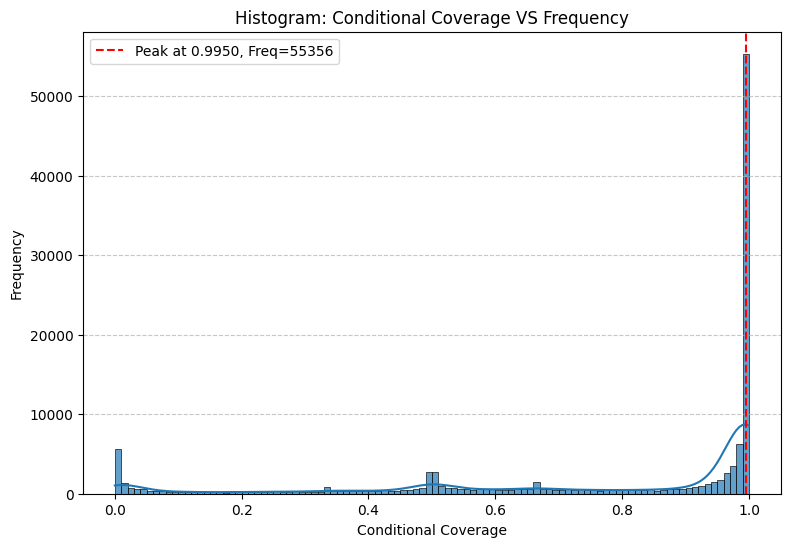

55356 (44.51%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0185 ± 0.0092
Final Average Prediction Set Size: 2.87 ± 0.06
Final Average Coverage: 0.8989 ± 0.0030
Final Average Real Probability: 0.7444 ± 0.0050


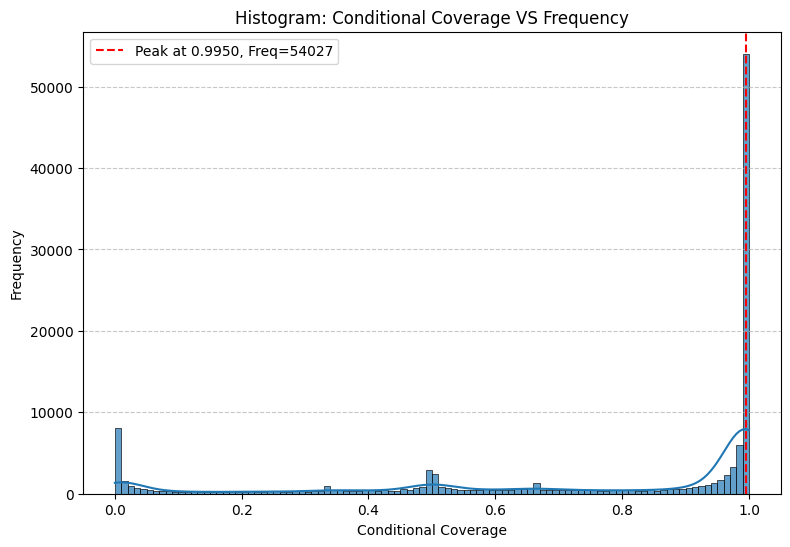

54027 (43.44%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9118 ± 0.0016
Final Average Prediction Set Size: 11.87 ± 0.20
Final Average Coverage: 0.8990 ± 0.0027
Final Average Real Probability: 0.8098 ± 0.0033


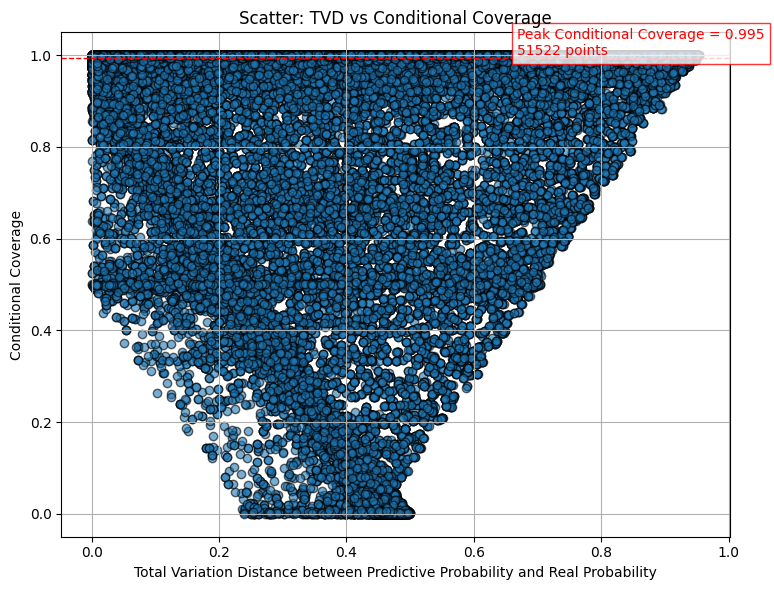

Peak Conditional Coverage = 0.995, with 51522 samples

=== Count Regions Summary ===
41477 (33.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
34275 (27.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
37289 (30.0%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.53204', '0.39023']
  Real Probability Set      : ['0.49974', '0.49975']
Sample 2:
  Predictive Probability Set: ['0.94137']
  Real Probability Set      : ['0.85742']
Sample 3:
  Predictive Probability Set: ['0.57853', '0.32332']
  Real Probability Set      : ['0.61934', '0.37645']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.89513', '0.01316']
  Real Probability Set      : ['0.00015', '0.00015']
Sample 2:
  Predictive Probability Set: ['0.82696', '0.06409', '0.01854']
  Real Probability Set      : ['0.12928', '0.00030', '0.00030']
Sample 3:
  Predictive Pr

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9542 ± 0.0023
Final Average Prediction Set Size: 3.53 ± 0.03
Final Average Coverage: 0.8990 ± 0.0025
Final Average Real Probability: 0.7726 ± 0.0034


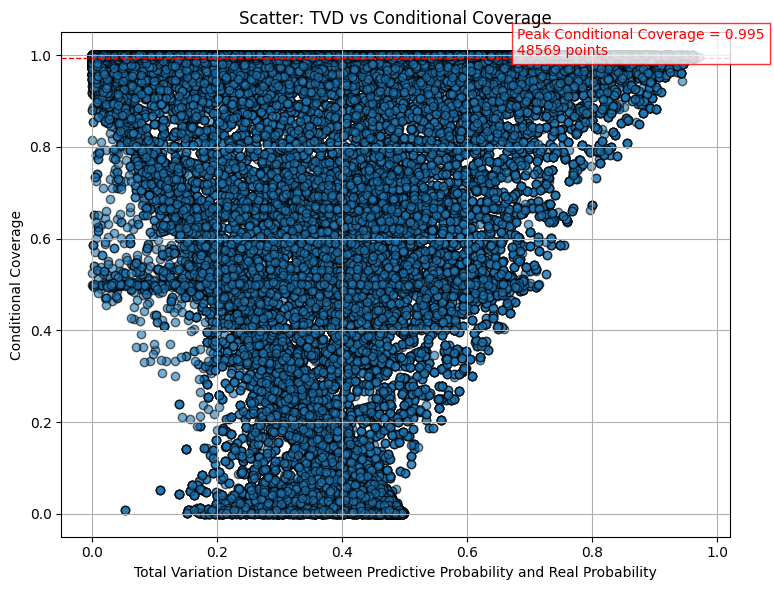

Peak Conditional Coverage = 0.995, with 48569 samples

=== Count Regions Summary ===
46396 (37.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
28378 (22.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
44067 (35.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.92773', '0.02326', '0.00811']
  Real Probability Set      : ['0.99239', '0.00000', '0.00127']
Sample 2:
  Predictive Probability Set: ['0.59000', '0.40477']
  Real Probability Set      : ['0.49967', '0.49963']
Sample 3:
  Predictive Probability Set: ['0.89197', '0.10734']
  Real Probability Set      : ['0.97832', '0.02168']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.20472', '0.17201', '0.13183', '0.11484', '0.07945', '0.06562', '0.05227']
  Real Probability Set      : ['0.00058', '0.00058', '0.00058', '0.00058', '0.00058', '0.00058', '0.00381']
Sample 2:

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0186 ± 0.0067
Final Average Prediction Set Size: 2.86 ± 0.04
Final Average Coverage: 0.8993 ± 0.0020
Final Average Real Probability: 0.7441 ± 0.0034


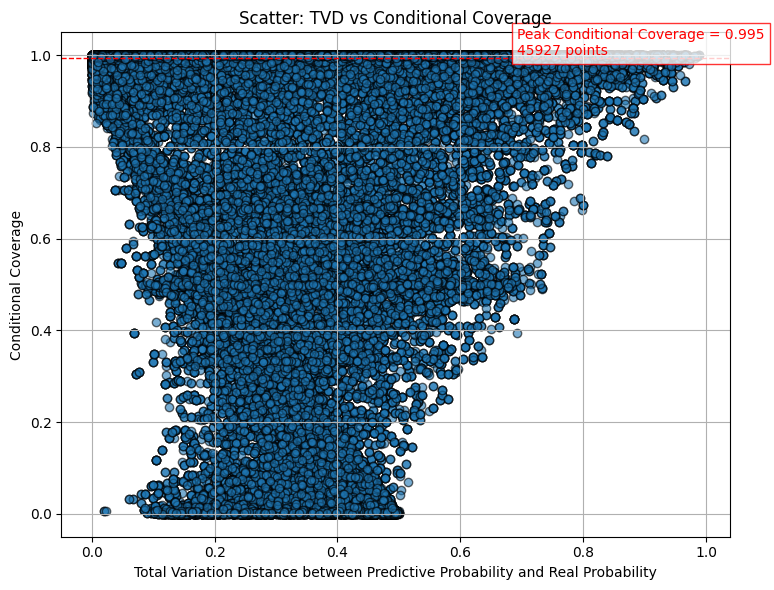

Peak Conditional Coverage = 0.995, with 45927 samples

=== Count Regions Summary ===
46827 (37.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23814 (19.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
47415 (38.1%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99710']
  Real Probability Set      : ['0.99037']
Sample 2:
  Predictive Probability Set: ['0.93561', '0.02380']
  Real Probability Set      : ['0.98598', '0.01234']
Sample 3:
  Predictive Probability Set: ['0.98430']
  Real Probability Set      : ['0.99977']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.29802', '0.18376', '0.07623', '0.06980', '0.05643', '0.04359']
  Real Probability Set      : ['0.00219', '0.00024', '0.00018', '0.09630', '0.00064', '0.00018']
Sample 2:
  Predictive Probability Set: ['0.19285', '0.13432', '0.12969', '0.06092', '0.05339', '

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)